# Los intervalos de confianza

En esta lección veremos otra manera de cuantificar la incertidumbre en las estimaciones que estemos haciendo sobre nuestros datos: hablaremos de los intervalos de confianza.

Como en las lecciones anteriores comenzaremos con un ejemplo intuitivo para luego dar una definición formal de lo que son los intervalos de confianza. Al final analizaremos la relación que tiene este intervalo de confianza con el error estándar, visto en la lección anterior, y con el tamaño de la muestra.

## 1. Ejemplo intuitivo

Para comenzar a tener una idea general de lo que son los intervalos de confianza, comencemos leyendo el set de datos *dataset-precios-viviendas.csv* que contiene el valor (en miles de dólares) de 10150 viviendas en una localidad determinada:

In [107]:
# Importar librerías
import pandas as pd
import seaborn as sns
import numpy as np

# Leer dataset
ruta ="/Users/hectorrr/proyectos/pruebas prametricas/dataset-precios-viviendas.csv"
df = pd.read_csv(ruta)
df

,Precio (USDx1000)
0,324.5
1,315.5
2,326.7
3,339.1
4,314.2
...,...
10145,333.3
10146,300.9
10147,315.4
10148,293.0


De nuevo, seguiremos considerando que este set de datos es la población (a la cual casi nunca podremos acceder).

Supongamos que queremos responder a estas cuatro preguntas:

1. ¿Cuál es la media **estimada** del costo de las viviendas?
2. ¿Cuál es el rango de valores en el que esperaría que esté la estimación de la media de los precios el 100% de las veces?
3. ¿Cuál es el rango de valores en el que esperaría que esté la estimación de la media de los precios el 95% de las veces?
4. ¿Cuál es el rango de valores en el que esperaría que esté la estimación de la media de los precios el 90% de las veces?

Veremos que las respuestas a las preguntas (2) a (4) será precisamente lo que se conocen como los intervalos de confianza.

Y para poder dar respuesta a estas preguntas podemos retomar el concepto de distribución muestral. Así que, por ejemplo para responder a la pregunta 1 (media **estimada**) debemos:

- Calcular la distribución muestral de las medias
- Calcular la media de esa distribución muestral
- El resultado será una estimación bastante aproximada de la media real de la población

Así que comencemos realizando esta implementación, comenzando con la función `calcular_d_muestral` que hemos venido usando en lecciones anteriores:

In [108]:
# Función para obtener distribuciones muestrales (usando la media de la muestra)
def calcular_d_muestral(arreglo, n=200, trials=1000):
    # Inicializar arreglo que contendrá la distribución
    dm = np.zeros((trials))
    muestra_n=[]
    # Iterar por el número de "trials" y en cada iteración:
    # Extraer "n" muestras aleatoriamente
    # Calcular la estadística (media de la muestra)
    # Almacenar resultado
    for i in range(trials):
        # Muestreo aleatorio
        muestra = np.random.choice(arreglo, n)
        muestra_n.append(muestra)
        # Calcular estadística y almacenar en la distribución
        dm[i] = np.mean(muestra)
    
    # Al terminar las iteraciones retornar la distribución muestral
    return dm, muestra_n

Usemos entonces esta función para calcular la distribución muestral de las medias de los precios de las viviendas (columna 'Precios (USDx1000)') y usando el valor por defecto del tamaño de la muestra *n=200*:

In [109]:
# Calcular distribución muestral
dm_medias, muestra_n = calcular_d_muestral(df['Precio (USDx1000)'].to_numpy())
pd.DataFrame(muestra_n)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,302.3,306.6,321.5,339.0,335.8,306.2,320.8,323.6,348.3,301.5,...,309.8,314.0,340.2,335.2,322.1,338.6,301.8,301.5,316.8,291.3
1,327.4,314.0,295.8,302.7,314.8,290.0,319.0,315.5,322.1,296.0,...,328.7,310.5,327.3,311.7,299.2,299.8,316.1,321.0,325.0,330.6
2,330.3,335.2,326.0,328.5,320.2,300.6,317.0,325.3,302.9,314.0,...,290.8,318.4,313.8,331.0,334.0,313.8,317.8,332.7,329.1,313.3
3,325.3,350.4,302.0,316.7,305.8,300.5,295.9,318.7,332.2,307.5,...,341.6,328.8,319.2,305.4,319.0,303.0,320.7,331.0,327.6,296.0
4,303.1,303.8,314.4,296.7,292.4,321.6,338.3,316.0,298.2,314.5,...,340.2,331.8,282.2,321.7,312.6,335.4,324.6,313.2,320.1,324.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,319.1,319.5,320.5,338.7,332.3,298.1,330.2,317.1,324.3,320.4,...,359.8,302.4,322.0,307.1,326.3,317.2,305.4,323.1,319.9,313.3
996,326.2,313.2,317.3,335.8,327.7,315.9,303.3,320.1,319.4,341.0,...,306.7,317.4,316.1,321.1,333.2,334.2,317.1,341.0,315.3,308.3
997,314.8,312.7,324.0,313.1,297.2,308.9,302.4,332.5,300.8,304.4,...,324.3,300.2,336.5,336.3,300.3,338.0,296.8,310.2,335.2,316.5
998,331.1,320.3,319.5,305.2,323.0,298.4,316.6,331.0,303.2,301.8,...,318.4,300.6,310.0,327.7,325.7,290.1,315.2,329.7,324.8,328.2


In [110]:

# Imprimir media estimada y media real (de la población)
print(f'Precio medio estimado (muestra con n=200): {1000*dm_medias.mean():.2f}')
print(f'Precio medio real (población): {1000*df["Precio (USDx1000)"].mean():.2f}')

Precio medio estimado (muestra con n=200): 317457.50
Precio medio real (población): 317450.25


Text(0.5, 1.0, 'Distribución muestral variable 1')

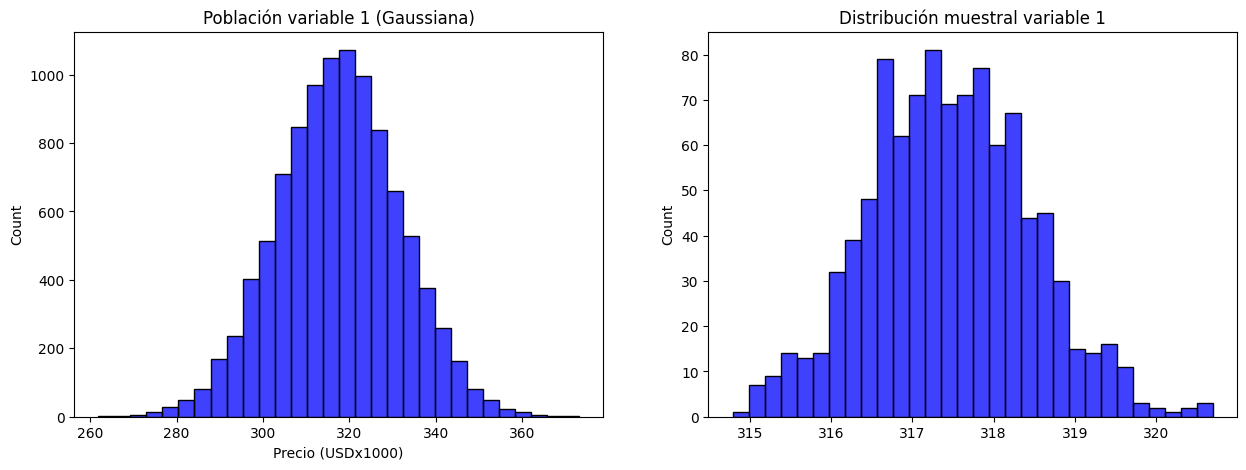

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Histogramas columna 1 (población y distribución de las medias)
sns.histplot(df["Precio (USDx1000)"], ax=axs[0], color='blue', bins=30)
axs[0].set_title('Población variable 1 (Gaussiana)')

sns.histplot(dm_medias, ax=axs[1], color='blue', bins=30)
axs[1].set_title('Distribución muestral variable 1')

Perfecto, ya hemos calculado la media estimada a partir de la distribución muestral (317.480 USD) y hemos verificado que es una muy buena estimación del valor real calculado a partir de la población (317.450 USD).

Con esto ya podemos responder la primera pregunta:

**1. ¿Cuál es la media estimada del costo de las viviendas?**
Respuesta: 317.371 USD

Ahora nos vamos a enfocar en las tres preguntas restantes, que nos permitirán tener una idea del concepto de intervalos de confianza.

Comencemos con la segunda pregunta:

**2. ¿Cuál es el rango de valores en el que esperaría que esté la estimación de la media de los precios el 100% de las veces?**

Comencemos entendiendo la pregunta:

- **¿Por qué nos preguntamos por un rango de valores?** Porque la estimación de la media dependerá de la muestra de datos que tomemos, así que no será siempre el mismo valor (unas veces será, por ejemplo, 317.480, otras será 317.415 y así sucesivamente).
- Así que la estimación de la media tiene un nivel de **incertidumbre**
- Y si estimamos el rango de valores **estaremos cuantificando ese nivel de incertidumbre**

Y para responder a la pregunta podemos comenzar dibujando la distribución muestral de las medias calculada anteriormente:

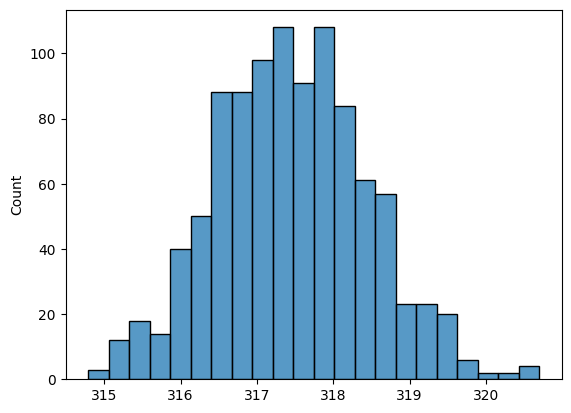

In [112]:
ax = sns.histplot(dm_medias)

En este histograma vemos cómo están distribuidos los diferentes valores que están presentes en la distribución muestral y vemos que el rango va desde aproximadamente 314 a 321 mil dólares.

¡Y estos son todos los posibles valores que podría tener la estimación, es decir el 100% que estamos buscando!

Específicamente este rango dentro del cual se encuentra el 100% de las estimaciones se puede obtener calculando los valores mínimo y máximo de la distribución muestral:

In [113]:
print(f"Intervalo de confianza del 100%: {dm_medias.min()*1000:.0f} a {dm_medias.max()*1000:.0f} USD")

Intervalo de confianza del 100%: 314790 a 320696 USD


Así que a la segunda pregunta podemos responder lo siguiente:

**2. ¿Cuál es el rango de valores en el que esperaría que esté la estimación de la media de los precios el 100% de las veces?**
Respuesta: el 100% de las veces la media estimada de los precios de las viviendas estará en el rango de 313.951 a 320.962 USD

Otras maneras de escribir esta respuesta serían:
- Existe un 100% de probabilidad de que la media de la población esté entre 313.951 a 320.962 USD (lo cual es cierto, pues el valor real de la media es de 317.450 USD, que se encuentra dentro de este rango).
- Con un nivel de confianza del 100% podemos decir que la media de la población estará en el rango de 313.951 a 320.962 USD

Vamos ahora a la tercera pregunta:

**3. ¿Cuál es el rango de valores en el que esperaría que esté la estimación de la media de los precios el 95% de las veces?**

La respuesta a esta pregunta la podemos obtener de manera similar a la pregunta anterior, pero en lugar de tomar el 100% de la distribución tendremos que tomar la porción central equivalente al 95%:

![](ic-95.png)

Y para calcular los límites inferior y superior de esta porción correspondiente al 95% debemos simplemente:

- Calcular el percentil (5/2) = 2.5, que será precisamente el límite inferior
- Calcular el percentil 100 - 5/2 = 97.5, que será precisament el límite inferior

Y esto lo podemos lograr creando una sencilla función que calcule estos percentiles dependiendo del porcentaje que queramos cubrir. Llamaremos a esta función `calcular_IC` pues precisamente el cálculo será el intervalo de confianza que estamos buscando:

In [114]:
# Función para calcular el intervalo de confianza

def calcular_IC(distribucion, ic=0.95):
    # Calcular umbrales percentiles del lado izquierdo y derecho
    lim_izq = (1-ic)/2 * 100
    lim_der = (ic + (1-ic)/2) * 100
    
    # Calcular valores percentiles izquierdo y derecho
    perc_izq = np.percentile(distribucion, lim_izq)
    perc_der = np.percentile(distribucion, lim_der)
    
    # Retornar intervalo redondeado a 2 decimales    
    return [np.round(perc_izq,2), np.round(perc_der,2)]

Y ahora sí podemos usar esta función para determinar los límites que corresponden al 95% de la distribución muestral:

In [115]:
lim_inf, lim_sup = calcular_IC(dm_medias, ic=0.95)

print(f"Intervalo de confianza del 95%: {lim_inf*1000:.0f} a {lim_sup*1000:.0f} USD")

Intervalo de confianza del 95%: 315540 a 319470 USD


Superpongamos este intervalo de confianza al gráfico de la distribución muestral para tener claro lo que acabamos de calcular:

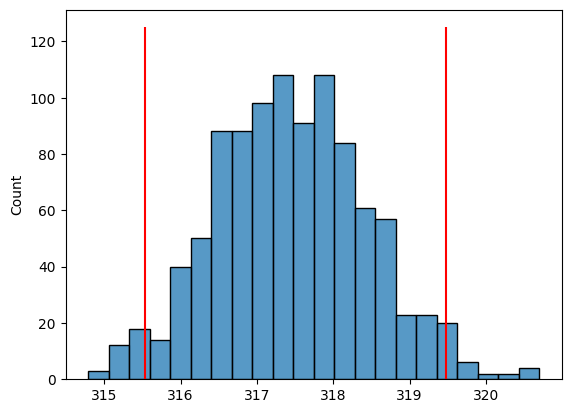

In [116]:
# Histograma distribución muestral de las medias
ax = sns.histplot(dm_medias)

# Superponer límites inferior y superior del intervalo de confianza
ax.vlines(x=[lim_inf, lim_sup], ymin=0, ymax=125, colors='r');

Así que a la tercera pregunta podemos responder:

**3. ¿Cuál es el rango de valores en el que esperaría que esté la estimación de la media de los precios el 95% de las veces?**
Respuesta: entre 315.590 y 319500 USD

Otras maneras de escribir esta respuesta serían:
- Hay un 95% de probabilidad de que la media de la población esté en entre 315.590 y 319.500 USD.
- Con un nivel de confianza del 95% podemos decir que la media de la población estará en el rango de 315.590 y 319.500 USD

Y finalmente la cuarta pregunta:

**4. ¿Cuál es el rango de valores en el que esperaría que esté la estimación de la media de los precios el 90% de las veces?**

La cual podemos responder usando la misma lógica anterior pero definiendo el parámetro `ic` en la función `calcular_IC` con un valor de 0.90:

Intervalo de confianza del 90%: 315890 a 319180 USD


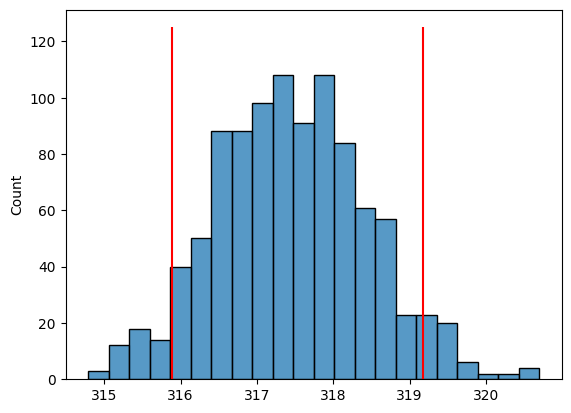

In [117]:
# Calcular e imprimir intervalo de confianza del 90%
lim_inf, lim_sup = calcular_IC(dm_medias, ic=0.9)
print(f"Intervalo de confianza del 90%: {lim_inf*1000:.0f} a {lim_sup*1000:.0f} USD")

# Dibujar histograma y superponer los límites de este intervalo
ax = sns.histplot(dm_medias)
ax.vlines(x=[lim_inf, lim_sup], ymin=0, ymax=125, colors='r');

Así que a esta cuarta pregunta podemos responder:

**4. ¿Cuál es el rango de valores en el que esperaría que esté la estimación de la media de los precios el 90% de las veces?**
Respuesta: entre 315.880 y 319.220 USD

Otras formas de escribir esta respuesta serían:
- Hay un 90% de probabilidades de que la media de la población esté en el rango de 315.880 y 319.220 USD 
- Con un nivel de confianza del 90% podemos decir que la media de la población estará en el rango de 315.880 y 319.220 USD

Resumamos las tres últimas respuestas para tener claros los principales elementos asociados a los intervalos de confianza:

|  %IC |           IC           | Diferencia límites izquierdo y derecho |
|:----:|:----------------------:|:--------------------------------------:|
| 100% | 314.235 a 320.598 USD  | 6363 USD                               |
| 95%  | 315.590 a 319.500 USD. | 3910 USD                               |
| 90%  | 315.880 a 319.220 USD  | 3340 USD                               |


Vemos que a medida que reducimos el nivel de certeza deseado (100%, 95%, 90%) también se reduce el intervalo de confianza.

## 2. Definición intervalo de confianza

<p></p>
<div style="background-color: #F7CAC9; color: black; padding: 10px;">
    El intervalo de confianza del X% es el rango de valores que nos permite tener un X% de confianza de que la estadística de la población estará dentro de dicho rango.
</div>

En los ejemplos anteriores la estadística usada fue la media, pero el mismo concepto aplica si la estadística es cualquier otra (la desviación estándar, la mediana, el rango intercuartiles, etc.).

Además, la condición sigue siendo la misma mencionada en el caso del Teorema del Límite Central: el tamaño de la muestra debe ser de al menos 30 datos.

## 3. Relación entre el intervalo de confianza, el error estándar y el tamaño de la muestra

En la lección anterior vimos que el error estándar es una manera de cuantificar la incertidumbre en la estimación que obtengamos a partir de la distribución muestral. Recordemos que este error estándar es la desviación estándar de la distribución muestral de nuestra estadística y recordemos además que:

- A mayor error estándar mayor incertidumbre (más dispersión entre las diferentes estimaciones de la estadística)
- A menor error estándar menor incertidumbre (menos dispersas estarán las estimaciones de la estadística)

Y también recordemos que el error estándar depende del tamaño de la muestra: entre mayor sea el tamaño de la muestra más pequeño será el error estándar y viceversa.

En esta parte la idea es relacionar estos dos elementos con el intervalo de confianza. Y para ello haremos este sencillo experimento partiendo del set de datos *dataset-precios-viviendas.csv*:

1. Para tamaños de muestra de 200, 1000 y 5000 calcularemos el IC y el error estándar. Usaremos un IC del 95% y el valor lo almacenaremos como la diferencia entre el límite derecho y el izquierdo
2. Tabularemos los resultados para realizar las comparaciones correspondientes

In [122]:
N = [200, 2000, 6000]
def calcular_d_muestral(arreglo, n=200, trials=1000):
    # Inicializar arreglo que contendrá la distribución
    dm = np.zeros((trials))
    muestra_n=[]
    # Iterar por el número de "trials" y en cada iteración:
    # Extraer "n" muestras aleatoriamente
    # Calcular la estadística (media de la muestra)
    # Almacenar resultado
    for i in range(trials):
        # Muestreo aleatorio
        muestra = np.random.choice(arreglo, n)
        muestra_n.append(muestra)
        # Calcular estadística y almacenar en la distribución
        dm[i] = np.mean(muestra)
    return dm, muestra_n

errores_est_1 = []
intervs_conf_1 = []
dm_medias_n_muestra=[]
limite_inferior=[]
limite_superior=[]
for i in N:
    #dm_medias es la media calculada de la muestra
    #mientras que variable_n es la muestra recolecatada
    dm_medias, variable_n= calcular_d_muestral(df["Precio (USDx1000)"].to_numpy(),n=i)
    errores_est=dm_medias.std()
    lim_inf, lim_sup=calcular_IC(dm_medias, ic=0.95)
    intervs_conf=lim_sup-lim_inf
    dm_medias_n_muestra.append(list(dm_medias))
    errores_est_1.append(np.round(errores_est,2))
    intervs_conf_1.append(round(intervs_conf,1))
    limite_inferior.append(lim_inf)
    limite_superior.append(lim_sup)
print(type(variable_n))
print(errores_est_1)
print(intervs_conf_1)
print(limite_inferior)
print(limite_superior)


    

<class 'list'>
[np.float64(0.98), np.float64(0.32), np.float64(0.18)]
[np.float64(3.8), np.float64(1.3), np.float64(0.7)]
[np.float64(315.52), np.float64(316.82), np.float64(317.07)]
[np.float64(319.36), np.float64(318.09), np.float64(317.79)]


Y podemos ver claramente que a medida que tenemos un mayor tamaño de la muestra:

- Logramos reducir el error estándar
- Y también reducimos el rango de valores cubierto por el intervalo de confianza

Lo cual quiere decir que en últimas mejora la estimación de la estadística (que en este caso era la media).

Así que, de nuevo, concluimos que **entre más datos tengamos menos incertidumbre tendremos en la estimación de la estadística**.

## 4. Aspectos a tener en cuenta

- El intervalo de confianza y el error estándar son dos maneras diferentes de medir la incertidumbre en nuestras estimaciones.
- El intervalo de confianza nos indica el nivel de certeza (medido como un porcentaje) que tendremos de que la estadística en la población se encuentre dentro de un rango determinado de valores
- En general entre más grande sea el tamaño de la muestra mejores serán las estimaciones. Es decir la amplitud del rango de valores del intervalo de confianza se reduce cuando el tamaño de la muestra se incrementa.